In [114]:
import tensorflow as tf

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import models, layers, optimizers, callbacks

In [116]:
# url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'
# downloaded_file = wget.download(url)

In [117]:
moore_data = pd.read_csv('./../../../data/deep_learning_recurrent_neural_networks_in_python/section_3/moore.csv', header=None).to_numpy()
# np.isinf(moore_data).any()
moore_data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [118]:
X = moore_data[:, 0].reshape(-1, 1)
Y = moore_data[:, 1]

print(X)

[[1971]
 [1972]
 [1973]
 [1973]
 [1974]
 [1974]
 [1974]
 [1975]
 [1976]
 [1976]
 [1976]
 [1978]
 [1978]
 [1979]
 [1979]
 [1979]
 [1981]
 [1982]
 [1982]
 [1983]
 [1984]
 [1984]
 [1985]
 [1985]
 [1985]
 [1986]
 [1986]
 [1986]
 [1987]
 [1987]
 [1987]
 [1987]
 [1988]
 [1988]
 [1989]
 [1989]
 [1989]
 [1989]
 [1990]
 [1991]
 [1991]
 [1992]
 [1992]
 [1993]
 [1993]
 [1994]
 [1994]
 [1995]
 [1999]
 [1995]
 [1996]
 [1997]
 [1997]
 [1997]
 [1998]
 [1999]
 [1999]
 [2000]
 [2000]
 [1999]
 [1999]
 [1999]
 [2000]
 [2001]
 [2001]
 [2002]
 [2004]
 [2004]
 [2005]
 [2006]
 [2005]
 [2006]
 [2007]
 [2008]
 [2003]
 [2003]
 [2002]
 [2005]
 [2005]
 [2006]
 [2007]
 [2003]
 [2008]
 [2009]
 [2011]
 [2012]
 [2007]
 [2007]
 [2008]
 [2004]
 [2007]
 [2008]
 [2008]
 [2007]
 [2009]
 [2010]
 [2012]
 [2013]
 [2011]
 [2010]
 [2010]
 [2012]
 [2012]
 [2010]
 [2012]
 [2014]
 [2006]
 [2015]
 [2013]
 [2015]
 [2008]
 [2010]
 [2014]
 [2015]
 [2015]
 [2012]
 [2011]
 [2010]
 [2014]
 [2011]
 [2012]
 [2014]
 [2016]
 [2017]
 [2017]


In [119]:
X = X-X.mean() # center the X values

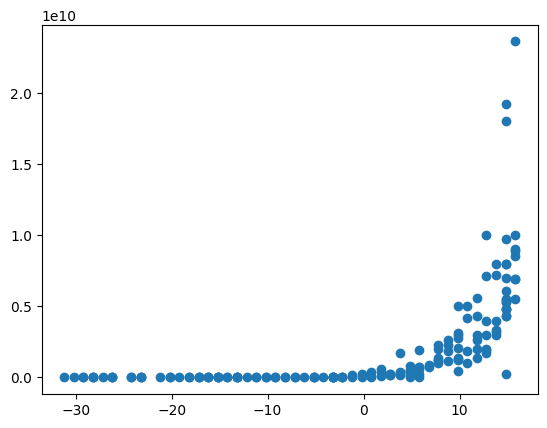

In [120]:
plt.scatter(X, Y)

In [121]:
Y = np.log(Y) # log-transform the Y values removed its exponentiality

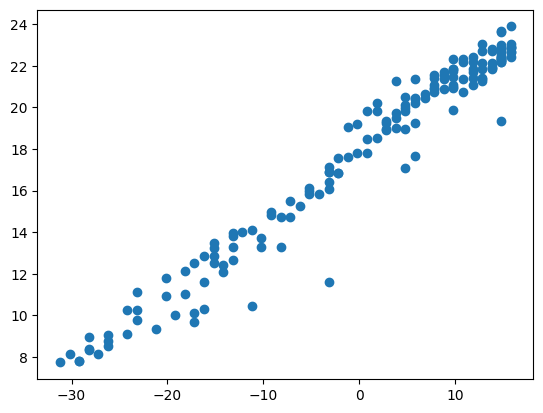

In [122]:
# Now we can see growth is linear
plt.scatter(X, Y)

In [123]:
model = models.Sequential([
    layers.Input(shape=(1, )),
    layers.Dense(1)
])

In [124]:
model.compile(
    optimizer=optimizers.SGD(0.0001, 0.9),
    loss='mse',
)

In [125]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = callbacks.LearningRateScheduler(schedule)

In [128]:
# r = model.fit(X, Y, epochs=50)
r = model.fit(X, Y, epochs=50, callbacks=[scheduler])

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 280.4716 - learning_rate: 0.0010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 310.7027 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 229.4990 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 293.3553 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 241.2511 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 156.9837 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 137.5075 - learning_rate: 0.0010
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 202.2822 - learning_rate: 0.0010
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141.3350 - learning_rate: 0.0010
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.7797 - learning_rate: 0.0010
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.7225 - learning_rate: 0.0010
Epoch 12/50
6/6 ━━━━━

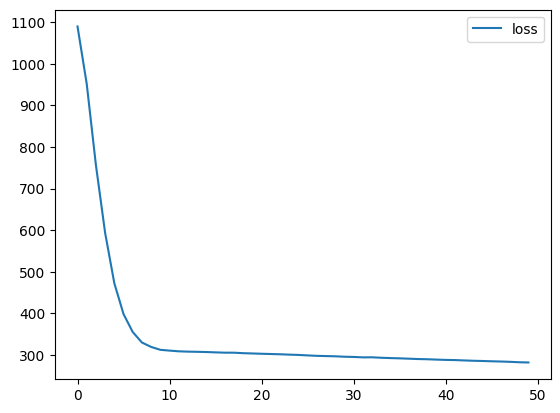

In [127]:
plt.plot(r.history['loss'], label='loss')
plt.legend()
# plt.show()

In [130]:
model.layers[0].get_weights()

[array([[0.35005847]], dtype=float32), array([17.726437], dtype=float32)]

In [131]:
a = model.layers[0].get_weights()[0][0, 0]
a

np.float32(0.35005847)

In [132]:
print("Time to double:", np.log(2)/a)

Time to double: 1.9800897492698506
